<a href="https://colab.research.google.com/github/Ignacio-Ibarra/NLP-Disasters/blob/intento_4/intento_4/model/LSTM_over_Keyword_Location_Cleaned_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading CSV files

In [ ]:
x_train = pd.read_csv(r'https://raw.githubusercontent.com/Ignacio-Ibarra/NLP-Disasters/intento_4/intento_4/csv/x_train_cleaned.csv', 
                    usecols = ['text_cleaned','location_cleaned','keyword_cleaned'])
x_test = pd.read_csv(r'https://raw.githubusercontent.com/Ignacio-Ibarra/NLP-Disasters/intento_4/intento_4/csv/x_test_cleaned.csv',
                    usecols = ['text_cleaned','location_cleaned','keyword_cleaned'])
id_test = pd.read_csv(r'https://raw.githubusercontent.com/Ignacio-Ibarra/NLP-Disasters/intento_4/intento_4/csv/x_test_cleaned.csv',
                    usecols = ['id'])
y_train = pd.read_csv(r'https://raw.githubusercontent.com/Ignacio-Ibarra/NLP-Disasters/intento_4/intento_4/csv/y_train_cleaned.csv')

In [ ]:
len(x_train) 

6879

In [ ]:
x_train['text_cleaned'] = x_train['text_cleaned'].apply(lambda x: " ".join([str(i) for i in str(x).split()]))
x_train['keyword_cleaned'] = x_train['keyword_cleaned'].apply(lambda x: " ".join([str(i) for i in str(x).split()]))
x_train['location_cleaned'] = x_train['location_cleaned'].apply(lambda x: " ".join([str(i) for i in str(x).split()]))

x_test['text_cleaned'] = x_test['text_cleaned'].apply(lambda x: " ".join([str(i) for i in str(x).split()]))
x_test['keyword_cleaned'] = x_test['keyword_cleaned'].apply(lambda x: " ".join([str(i) for i in str(x).split()]))
x_test['location_cleaned'] = x_test['location_cleaned'].apply(lambda x: " ".join([str(i) for i in str(x).split()]))

# Tokenizer

In [ ]:
pd.set_option('max_colwidth', 200)
(x_train['text_cleaned'] + (' ') + x_train['keyword_cleaned'] + (' ') + x_train['location_cleaned']).head()

0                                                deeds reason earthquake may allah forgive us keyword location
1                                                        forest fire near la range ask canada keyword location
2    residents asked shelter place notified officers evacuation shelter place orders expected keyword location
3                                  13000 people receive wildfire evacuation orders california keyword location
4                                      got sent photo ruby alaska smoke wildfire pours school keyword location
dtype: object

## Instantiating the Tokenizer

In [ ]:
#Top word is the quantity of differents words that our word_index will have. 
top_word = 35000

In [ ]:
#Here we instantiate the tokenizer
tokenizer = Tokenizer(num_words=top_word)

#Here we make the fit we three features that are strings
tokenizer.fit_on_texts((x_train['text_cleaned'] + (' ') + x_train['keyword_cleaned'] + (' ') + x_train['location_cleaned']))

## Text to sequences of word_indexes

Converting the text into a sequence of integers, all of them are indexes of the tokenizer.word_index

In [ ]:
#Training set to sequence
x_train_txt = tokenizer.texts_to_sequences(x_train['text_cleaned'])
x_train_key = tokenizer.texts_to_sequences(x_train['keyword_cleaned'])
x_train_loc = tokenizer.texts_to_sequences(x_train['location_cleaned'])

#Test set to sequence
x_test_txt = tokenizer.texts_to_sequences(x_test['text_cleaned'])
x_test_key = tokenizer.texts_to_sequences(x_test['keyword_cleaned'])
x_test_loc = tokenizer.texts_to_sequences(x_test['location_cleaned'])


## Padding sequence

We add zeros into each sequence unitl complete a maximum of lenght

In [ ]:
#MAXLEN for text, location and keyword
max_words_txt = max([len(x) for x in x_train_txt]) + 1
max_words_key = max([len(x) for x in x_train_key]) + 1
max_words_loc = max([len(x) for x in x_train_loc]) + 1

print("top_word: ", str(top_word))
print("max_words: ", str(max_words_txt))
print("max_words_ky: ", str(max_words_key))
print("max_words_lc: ", str(max_words_loc))

top_word:  35000
max_words:  25
max_words_ky:  4
max_words_lc:  8


In [ ]:
#Padding


x_train_txt = sequence.pad_sequences(x_train_txt, maxlen=max_words_txt)
x_train_key = sequence.pad_sequences(x_train_key, maxlen=max_words_key)
x_train_loc = sequence.pad_sequences(x_train_loc, maxlen=max_words_loc)

x_test_txt = sequence.pad_sequences(x_test_txt, maxlen=max_words_txt)
x_test_key = sequence.pad_sequences(x_test_key, maxlen=max_words_key)
x_test_loc = sequence.pad_sequences(x_test_loc, maxlen=max_words_loc)

print("X_train_txt.shape: ", x_train_txt.shape)
print("X_train_key.shape: ", x_train_key.shape)
print("X_train_loc.shape: ", x_train_loc.shape)

X_train_txt.shape:  (6879, 25)
X_train_key.shape:  (6879, 4)
X_train_loc.shape:  (6879, 8)


# y_train to_categorical

In [ ]:
# One-hot category
from keras.utils import to_categorical
y_train = to_categorical(y_train)
print("y_train.shape: ", y_train.shape)

y_train.shape:  (6879, 2)


## Loading word embedding file

---



In [ ]:
#Installing PyDrive
!pip install PyDrive

In [ ]:
#Importing modules
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
#Authenticating and creating the PyDrive client (ACA TENES QUE ENTRAR AL LINK, ENTRAR CON TU CUENTA DE GMAIL, TE VA A DAR UN ID UNA VEZ QUE LE DES 'ALLOW' 
#Y LUEGO TENES QUE COPIAR EL ID EN EL CAMPO QUE TE VA A GENERAR EN ESTA CELDA)
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#Getting the file
downloaded2 = drive.CreateFile({'id':"1LA2yR5TRNPQu2btbbFVVHMqcHsj3yCuS"})   # replace the id with id of file you want to access
downloaded2.GetContentFile('glove.twitter.27B.200d.txt')                             # replace the filename of file you want to access   

In [ ]:
embeddings_dictionary = dict()
glove_file = open('glove.twitter.27B.200d.txt', encoding="utf8")

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    
    embeddings_dictionary [word] = vector_dimensions

glove_file.close()

In [ ]:
embedding_dim = 200
embedding_matrix = zeros((top_word, embedding_dim))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

# LSTM Model

In [ ]:
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Dropout, Embedding, LSTM, Input, Conv2D, MaxPooling2D,Conv1D,MaxPooling1D
from keras.layers import Bidirectional,  Reshape, Flatten, GRU
from keras.layers.merge import concatenate

## Model 1 - Muy baja 'val_accuracy'[location, text, keyword] in Kaggle 0.79098

In [ ]:
# Defining the LSTM model 1

input1 = Input(shape=(max_words_txt,))
embedding_layer1 = Embedding(top_word, embedding_dim, weights=[embedding_matrix], input_length=max_words_txt, trainable=False)(input1)
dropout1 = Dropout(0.2)(embedding_layer1)
lstm1_1 = LSTM(128,return_sequences = True)(dropout1)
lstm1_2 = LSTM(128,return_sequences = True)(lstm1_1)
lstm1_2a = LSTM(128,return_sequences = True)(lstm1_2)
lstm1_3 = LSTM(128)(lstm1_2a)

input2 = Input(shape=(max_words_key,))
embedding_layer2 = Embedding(top_word, embedding_dim, weights=[embedding_matrix], input_length=max_words_key, trainable=False)(input2)
dropout2 = Dropout(0.2)(embedding_layer2)
lstm2_1 = LSTM(64,return_sequences = True)(dropout2)
lstm2_2 = LSTM(64,return_sequences = True)(lstm2_1)
lstm2_3 = LSTM(64)(lstm2_2)

input3 = Input(shape=(max_words_loc,))
embedding_layer3 = Embedding(top_word, embedding_dim, weights=[embedding_matrix], input_length=max_words_loc, trainable=False)(input3)
dropout3 = Dropout(0.2)(embedding_layer3)
lstm3_1 = LSTM(32,return_sequences = True)(dropout3)
lstm3_2 = LSTM(32,return_sequences = True)(lstm3_1)
lstm3_3 = LSTM(32)(lstm3_2)

merge = concatenate([lstm1_3, lstm2_3,lstm3_3])

dropout = Dropout(0.8)(merge)
dense1 = Dense(256, activation='relu')(dropout)
dense2 = Dense(128, activation='relu')(dense1)
output = Dense(2, activation='softmax')(dense2)
model1 = Model(inputs=[input1,input2,input3], outputs=output)
model1.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 25)           0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 25, 200)      7000000     input_8[0][0]                    
__________________________________________________________________________________________________
input_9 (InputLayer)            (None, 4)            0                                            
__________________________________________________________________________________________________
input_10 (InputLayer)           (None, 8)            0                                            
____________________________________________________________________________________________

### Optimizer

In [ ]:
from keras.optimizers import Adam

optimizer1 = Adam(lr = .0001, beta_1 = .9, beta_2 = .999, epsilon = 1e-10, decay = .0, amsgrad = False)
model1.compile(loss="binary_crossentropy", optimizer=optimizer1,
              metrics=["accuracy"])


### Training

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
es = EarlyStopping(monitor='val_loss', mode='min',verbose=1, patience = 4)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2, verbose = 1, 
                                           factor = 0.5, min_lr = 1e-8, cooldown=1)

prueba  = model1.fit([x_train_txt,x_train_key,x_train_loc], y_train, validation_split=0.2, epochs=20, batch_size=16, verbose=2, callbacks=[es, learning_rate_reduction])

Train on 5503 samples, validate on 1376 samples
Epoch 1/20
 - 49s - loss: 0.4351 - accuracy: 0.8094 - val_loss: 0.4488 - val_accuracy: 0.7958
Epoch 2/20
 - 50s - loss: 0.4258 - accuracy: 0.8143 - val_loss: 0.4578 - val_accuracy: 0.7871
Epoch 3/20
 - 50s - loss: 0.4163 - accuracy: 0.8196 - val_loss: 0.4582 - val_accuracy: 0.7958

Epoch 00003: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
Epoch 4/20
 - 50s - loss: 0.4083 - accuracy: 0.8243 - val_loss: 0.4514 - val_accuracy: 0.7900
Epoch 5/20
 - 50s - loss: 0.4015 - accuracy: 0.8268 - val_loss: 0.4828 - val_accuracy: 0.7674

Epoch 00005: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
Epoch 00005: early stopping


### Plotting results

In [ ]:
#Function to plot loss + accuracy in training and validation sets

def result_eva (loss,val_loss,acc,val_acc):
       
    epochs = range(1,len(loss)+1)
    plt.plot(epochs, loss,'b-o', label ='Training Loss')
    plt.plot(epochs, val_loss,'r-o', label ='Validation Loss')
    plt.title("Training and Validation Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    epochs = range(1, len(acc)+1)
    plt.plot(epochs, acc, "b-o", label="Training Acc")
    plt.plot(epochs, val_acc, "r-o", label="Validation Acc")
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

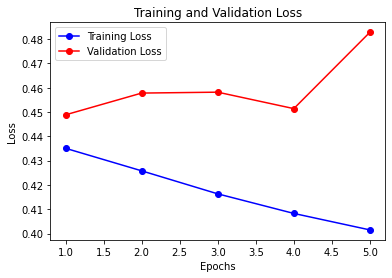

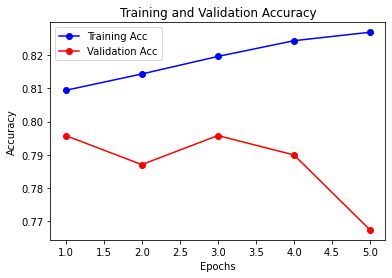

In [ ]:
result_eva(prueba.history['loss'], prueba.history['val_loss'], prueba.history['accuracy'], prueba.history['val_accuracy'])

### Predicting

In [ ]:
#Predicting test data

y_pred = model1.predict([x_test_txt,x_test_key,x_test_loc], batch_size=16, verbose=2)

In [ ]:
y_pred = np.argmax(y_pred,axis=1)

### Creating df for make the submission

In [ ]:
df = pd.DataFrame()
df['id'] = [int(x) for x in id_test.values]
df['target'] = y_pred


In [ ]:
from google.colab import files
df.to_csv('24.submit.csv', index=False)
files.download('24.submit.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Model 2 - LSTM+CNN over [location, text, keyword] - in Kaggle  0.80723



In [ ]:
input1 = Input(shape=(max_words_txt,))
embedding_layer1 = Embedding(top_word, embedding_dim, weights=[embedding_matrix], input_length=max_words_txt, trainable=False)(input1)
lstm1_1 = Bidirectional(LSTM(100, return_sequences=True,dropout = 0.2))(embedding_layer1)
lstm1_1a = Bidirectional(LSTM(100, return_sequences=True,dropout = 0.2))(lstm1_1)
lstm1_1b = Bidirectional(LSTM(100, return_sequences=True,dropout = 0.2))(lstm1_1a)
res = Reshape((-1, x_train_txt.shape[1], 100))(lstm1_1b)
conv1 = Conv2D(100, (3,3), padding='same',activation="relu")(res)
pool1 = MaxPooling2D(pool_size=(2,2))(conv1)
flat1 = Flatten()(pool1)

input2 = Input(shape=(max_words_key,))
embedding_layer2 = Embedding(top_word, embedding_dim, weights=[embedding_matrix], input_length=max_words_key, trainable=False)(input2)
lstm2_1 = Bidirectional(LSTM(100, return_sequences=True,dropout = 0.2))(embedding_layer2)
lstm2_1a = Bidirectional(LSTM(100, return_sequences=True,dropout = 0.2))(lstm2_1)
lstm2_1b = Bidirectional(LSTM(100, return_sequences=True,dropout = 0.2))(lstm2_1a)
res2 = Reshape((-1, x_train_key.shape[1], 100))(lstm2_1b)
conv2 = Conv2D(100, (3,3), padding='same',activation="relu")(res2)
pool2 = MaxPooling2D(pool_size=(2,2))(conv2)
flat2 = Flatten()(pool2)

input3 = Input(shape=(max_words_loc,))
embedding_layer3 = Embedding(top_word, embedding_dim, weights=[embedding_matrix], input_length=max_words_loc, trainable=False)(input3)
lstm3_1 = Bidirectional(LSTM(100, return_sequences=True,dropout = 0.2))(embedding_layer3)
lstm3_1a = Bidirectional(LSTM(100, return_sequences=True,dropout = 0.2))(lstm3_1)
lstm3_1b = Bidirectional(LSTM(100, return_sequences=True,dropout = 0.2))(lstm3_1a)
res3 = Reshape((-1, x_train_loc.shape[1], 100))(lstm3_1b)
conv3 = Conv2D(100, (3,3), padding='same',activation="relu")(res3)
pool3 = MaxPooling2D(pool_size=(2,2))(conv3)
flat3 = Flatten()(pool3)

merge = concatenate([flat1, flat2, flat3])

dropout = Dropout(0.4)(merge)
dense1 = Dense(256, activation='relu')(dropout)
dense2 = Dense(128, activation='relu')(dense1)
output = Dense(2, activation='softmax')(dense2)
model2 = Model(inputs=[input1,input2,input3], outputs=output)
model2.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 25)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 4)]          0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 25, 200)      7000000     input_1[0][0]                    
_______________________________________________________________________________________

In [ ]:
from keras.optimizers import Adam

optimizer2 = Adam(lr = .0001, beta_1 = .9, beta_2 = .999, epsilon = 1e-10, decay = .0, amsgrad = False)

In [ ]:
model2.compile(loss="binary_crossentropy", optimizer=optimizer2,
              metrics=["accuracy"])

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
es = EarlyStopping(monitor='val_loss', mode='min',verbose=1, patience = 4)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2, verbose = 1, 
                                           factor = 0.5, min_lr = 1e-8, cooldown=1)

prueba2 = model2.fit([x_train_txt,x_train_key,x_train_loc], y_train, validation_split=0.2, epochs=3, batch_size=16, verbose=2, callbacks=[es, learning_rate_reduction])

Epoch 1/3
344/344 - 77s - loss: 0.3544 - accuracy: 0.8492 - val_loss: 0.4689 - val_accuracy: 0.8016
Epoch 2/3
344/344 - 76s - loss: 0.3400 - accuracy: 0.8561 - val_loss: 0.4769 - val_accuracy: 0.7958
Epoch 3/3

Epoch 00003: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
344/344 - 76s - loss: 0.3271 - accuracy: 0.8644 - val_loss: 0.5056 - val_accuracy: 0.7965


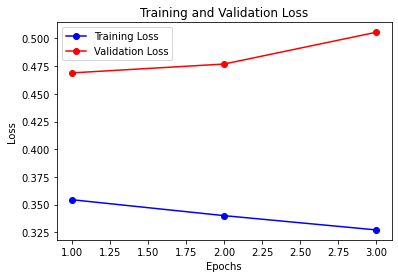

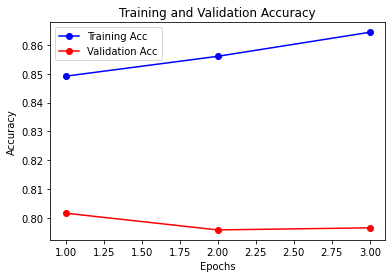

In [ ]:
result_eva(prueba2.history['loss'], prueba2.history['val_loss'], prueba2.history['accuracy'], prueba2.history['val_accuracy'])

In [ ]:
#Predicting test data

y_pred = model2.predict([x_test_txt,x_test_key,x_test_loc], batch_size=16, verbose=2)

204/204 - 18s


In [ ]:
y_pred = np.argmax(y_pred,axis=1)

In [ ]:
df = pd.DataFrame()
df['id'] = [int(x) for x in id_test.values]
df['target'] = y_pred
df.to_csv('28.submit.csv', index=False)

In [ ]:
from google.colab import files
files.download('28.submit.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>